In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

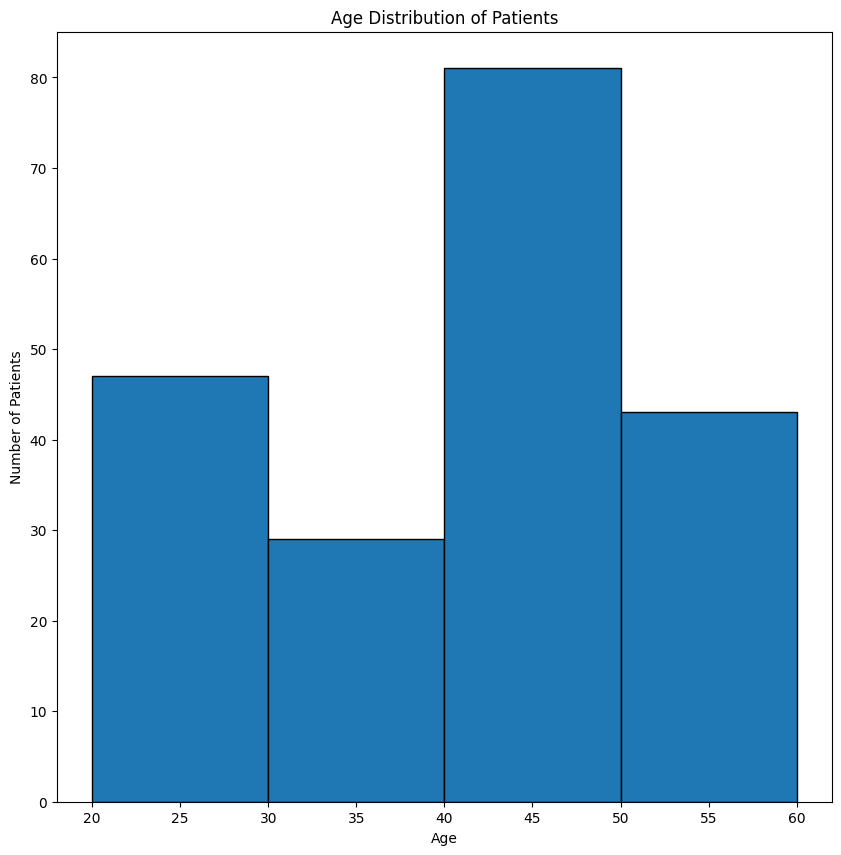

In [8]:
# Group No. 7
# 1. Benjarat Chooduang 6410450516
# 2. Kanyapat Thumthong 6410450346
# 3. Nopparuj Kunsongkhunakon 6410451687
# ---
#####
####
group = 7
problem = 2 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
#####
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_fwf(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# หา Age column
age_column = [col for col in data.columns if 'Age' in col][0]

# หาค่า average ของอายุ ที่ไม่ใช่ null
average_age = data[age_column].mean()

# เเทนค่า NaN ในAge column ด้วยค่า average ของอายุ
data[age_column].fillna(average_age, inplace=True)

# ทำค่าให้เป็น int
data[age_column] = data[age_column].astype(int)

# สร้าว bin เเละ labelsของเเต่ละช่วงตามดังกล่าว เเล้วนับจำนวนคนไข้ของเเต่ละช่วง
bins = [20, 30, 40, 50, 60]
labels = ["(20, 30]", "(30, 40]", "(40, 50]", "(50, 60]"]
data['Age Group'] = pd.cut(data[age_column], bins=bins, labels=labels, right=True)
age_grouped = data.groupby('Age Group').size().reset_index(name='Number of Patients')

# เรียงตาม 'Number of Patients' จากมากไปน้อย
age_grouped = age_grouped.sort_values(by='Number of Patients', ascending=False).reset_index(drop=True)

# สร้างแผนภูมิแท่ง (histogram) ของกลุ่มอายุผู้ป่วย
plt.figure(figsize=(10, 10))
data[age_column].hist(bins=bins, rwidth=1, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.grid(False)

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
age_grouped.to_csv(result_path, index=False)

# แสดงผลลัพธ์
age_grouped.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()